___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

A indústria cinematográfica é umas das maiores do mercado de entretenimento, movimentando bilhões de dólares anualmente, e assim gerando i um grande risco financeiro, com alguns filmes recentes com orçamentos de até 400 milhões de dólares. Esse risco poderia ser reduzido até certo ponto com o uso de um modelo quantitativo.

O objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento, assim tendo o intuito de fazer um modelo de predição com variáveis que geralmente já são conhecidas antes da estreia do filme.

A base de dados contém informações de aproximadamente 5000 filmes do site TMDB, que concentra vários dados sobre a produção, gênero, entre outros de peças cinematográficas.


___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados coletados que serão utilizados são : o revenue, budget , release date ,popularity ,vote_count e vote_average. O revenue se refere a quanto o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos, o release date é a data de lançamento mundial no formato dia/mês/ano , a popularity é referente ao número de pessoas que foram assistir o filme , vote_count é referente ao total de vezes em que o filme foi votado no TMDB e o vote_average é a nota media atribuída ao filme no site .

In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [38]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Desktop\Insper\2018\DPCD\DPCD\Projeto3


### BASE DE DADOS

In [39]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date','vote_count','popularity','vote_average']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes
nndf.head()


,revenue,budget,release_date,vote_count,popularity,vote_average
0,2787965087,237000000,2009-12-10,11800,150.437577,7.2
1,961000000,300000000,2007-05-19,4500,139.082615,6.9
2,880674609,245000000,2015-10-26,4466,107.376788,6.3
3,1084939099,250000000,2012-07-16,9106,112.312950,7.6
4,284139100,260000000,2012-03-07,2124,43.926995,6.1


In [40]:
for i in range (len(nndf)): #Deixa a data de lançamento como só o mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### ANÁLISE DESCRITIVA

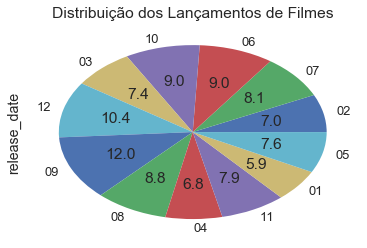

In [41]:
ut15 = (nndf.release_date.value_counts(sort=False, normalize=True)*100)
a4_dims = (10, 6)
plot = ut15.plot(kind='pie',title = "Distribuição dos Lançamentos de Filmes",autopct='%.1f')

Este gráfico demonstra como a distribuição dos lançamentos é semelhante entre os meses, mostrando que não existe uma grande preferência pela data de lançamento dos filmes

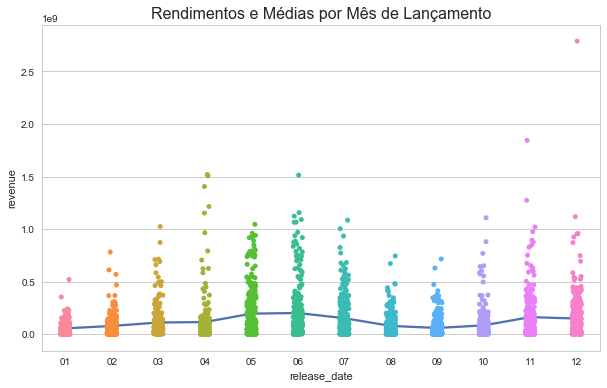

In [42]:
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Rendimentos e Médias por Mês de Lançamento', fontsize=16)
sns.set_context("talk")
sns.stripplot(x="release_date", y="revenue", data=nndf, jitter=True);

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]#ordena os meses
#média de cada mês
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
plt.plot(X2,Y2)

plt.show() 

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses de Maio, Junho , Julho, Novembro tem um maior rendimento médio, enquanto Janeiro e Setembro tem rendimento menor.

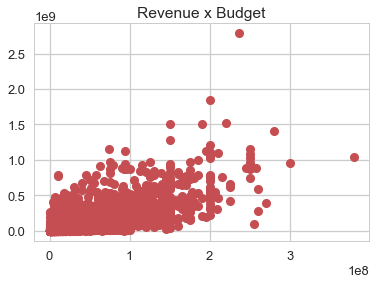

In [43]:
plt.plot(nndf['budget'],nndf['revenue'],'ro')
plt.title('Revenue x Budget')
plt.show()

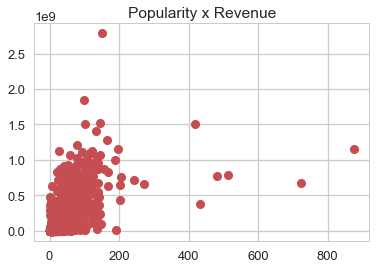

In [44]:
plt.plot(nndf['popularity'],nndf['revenue'],'ro')
plt.title('Popularity x Revenue')
plt.show()

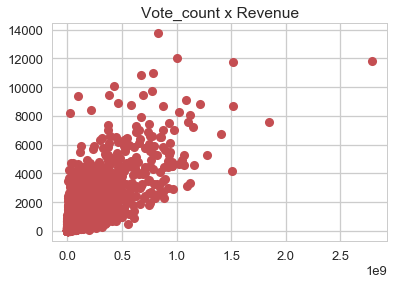

In [45]:
plt.plot(nndf['revenue'],nndf['vote_count'],'ro')
plt.title('Vote_count x Revenue')
plt.show()

Como é possível perber pelo gráfico, existe algum tipo de relação linear entre o Budget e o Revenue dos filmes

Ao observar os scatter plots notamos duas fortes correlações das variáveis Budget x Revenue e  Vote_count x Revenue e uma fraca correlação positiva do Reveneu x Popularity.
Assim optamos por escolher a variável Budget juntamente com a variável release date para fazer os nossos modelos de predição, uma vez que o vote_count só pode ser obtido após a estreia do filme.


___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

In [60]:
x = len (nndf)
nndf.sample(frac=1)# Aleatoriza o index de cada filme
DfTrain = nndf.iloc[:int(0.75*x)]# separa os filmes de 75% primeiros filmes como Treinamento
DfTrain = DfTrain.reset_index(drop=True)#Reseta o index dos filmes
DfTest = nndf.iloc[int(0.75*x):]# separa os filmes de 25% últimos filmes como Teste
DfTest = DfTest.reset_index(drop=True)#Reseta o index dos filmes

Como os dataframes para teste e treinamento foram aleatoriamente separados, eles serão mais semelhantes, assim tornarão o modelo de predição mais preciso.

In [47]:
import numpy as np
import statsmodels.api as sm

X = DfTrain[['release_date','budget']].round(0).astype(int)
X = X.values.reshape((len(X),2))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest[['release_date','budget']].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),2))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

#### R2 e RMS

R2 , é um número entre 0 e 1 , ele conta como a regressão se encaixa no data set, assim podemos dizer que o R2 retorna o valor até certo ponto em que a variável-x pode ser usada para predizer os valores da variável Y. No caso do nosso modelo , o R2 nos conta o a qualidade da predição do revenue pelo sua data de lançamento .


EXPLICAR RMS

#### Overfitting  e Underfitting 

Overfitting e underfitting são grandes causadores de má performance em modelos de predição, o overfitting se dá quando o algoritmo se molda aos dados da base de treinamento de forma que quando são inseridos novos dados ao model ele tem performance reduzida. E o underfitting acontece quando o modelo não bom suficiente para os dados de treinamento nem para novos dados.


#### Predição pela media 

EXPLICAR

In [48]:
y = DfTrain['revenue'].round(0).astype(int)
yhat = DfTrain.revenue.mean()                   
ssreg = np.sum((y-yhat)**2)
RMS = np.sqrt(ssreg/len(y))

print("Média total: ",yhat)
print("R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0")
print("RMS da Predição pela média:", RMS)

Média total:  151824958.12396693
R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0
RMS da Predição pela média: 199602533.76254264


#### MODELO DE REGRESSÃO LINEAR ( ordinary least squares):

EXPLICAR

In [49]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
Ypredictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     943.5
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          1.47e-303
Time:                        20:49:45   Log-Likelihood:                -48986.
No. Observations:                2420   AIC:                         9.798e+04
Df Residuals:                    2417   BIC:                         9.800e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.066e+06   7.84e+06     -1.157      0.248   -2.44e+07    6.31e+06
x1          9.305e+05   8.99e+05      1.035      0.301   -8.33e+05    2.69e+06
x2             2.9086      0.067     43.421      0.000       2.777       3.040
==============================================================================
Omnibus:                      824.944   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77619.298
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                      30.716   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
y = DfTrain['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = Ypredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2Train1 = 1-( ssreg / sstot)
RMSTrain1 = np.sqrt(ssreg/len(y))
print("RMS do Teste:",RMSTrain1)
print("R2 do Treinamento: ",r2Train1)

RMS do Teste: 149573893.2841234
R2 do Treinamento:  0.4384171544993586


In [51]:
XTest = sm.add_constant(XTest)
YTestpredictions = model.predict(XTest) # cria um array com as predições para a base de teste com o 
                                        # modelo da base de treinamento

In [52]:
y = DfTest['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = YTestpredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)  
RMSTest1 = np.sqrt(ssreg/len(y))
r2Test1 = 1-( ssreg / sstot)
print("RMS do Teste:",RMSTest1)
print("R2 do Teste: ",r2Test1)

RMS do Teste: 57215053.35678464
R2 do Teste:  -0.10478177748993689


In [53]:
print("RMS do Treinamento/RMS do Teste = ",RMSTrain1/RMSTest1)
print("R2 do Treinamento/R2 do Teste = ",r2Train1/r2Test1)

RMS do Treinamento/RMS do Teste =  2.614240213172618
R2 do Treinamento/R2 do Teste =  -4.184097321134523


Com os valores de RMS e R2 obtidos para o modelo, pode se chegar na conclusão de que ele sofre de underfitting, uma vez que o R2 para a base de treinamento é menor que 0,5 e o RMS é relativamente grande, portanto o modelo não prevê de maneira aceitável os dados de treinamento nem os de teste. Dessa forma o modelo não tem utilidade no mundo real.

Outra observação foi o valor t retornado pela regressão, que aponta que a release_date não influencia muito no resultado, dessa forma será feita uma nova regressão sem essa variável.


#### MODELO DE REGRESSÃO LINEAR sem o release_date

In [54]:
X = DfTrain['budget'].round(0).astype(int)
X = X.values.reshape((len(X),1))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest['budget'].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),1))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

In [55]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
Ypredictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1886.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          4.60e-305
Time:                        20:49:45   Log-Likelihood:                -48987.
No. Observations:                2420   AIC:                         9.798e+04
Df Residuals:                    2418   BIC:                         9.799e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.534e+06   4.65e+06     -0.545      0.586   -1.16e+07    6.58e+06
x1             2.9089      0.067     43.426      0.000       2.778       3.040
==============================================================================
Omnibus:                      826.431   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76640.829
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                      30.539   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
y = DfTrain['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = Ypredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2Train2 = 1-( ssreg / sstot)
RMSTrain2 = np.sqrt(ssreg/len(y))
print("RMS do Teste:",RMSTrain2)
print("R2 do Treinamento: ",r2Train2)

RMS do Teste: 149607021.52607664
R2 do Treinamento:  0.4381683635874256


In [57]:
XTest = sm.add_constant(XTest)
YTestpredictions = model.predict(XTest) # cria um array com as predições para a base de teste com o 
                                        # modelo da base de treinamento

In [58]:
y = DfTest['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = YTestpredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)  
RMSTest2 = np.sqrt(ssreg/len(y))
r2Test2 = 1-( ssreg / sstot)
print("RMS do Teste:",RMSTest2)
print("R2 do Teste: ",r2Test2)

RMS do Teste: 57180172.2966409
R2 do Teste:  -0.10343513143527283


In [59]:
print("RMS do Treinamento/RMS do Teste = ",RMSTrain2/RMSTest2)
print("R2 do Treinamento/R2 do Teste = ",r2Train2/r2Test2)

RMS do Treinamento/RMS do Teste =  2.616414318409905
R2 do Treinamento/R2 do Teste =  -4.236165773730569


Com os novos valores de RMS e R2 obtidos para o novo modelo, pode se chegar na conclusão de que ele  ainda sofre de underfitting, uma vez que o R2 para a base de treinamento continua menor que 0,5 e o RMS ainda é relativamente grande, portanto o modelo não prevê de maneira aceitável os dados de treinamento nem os de teste. Dessa forma o novo modelo continua em utilidade no mundo real.

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://www.kaggle.com/tmdb/tmdb-movie-metadata - Acessado em 25/05/2018

https://www.themoviedb.org/?language=en - Acessado em 25/05/2018

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/  - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate - Acessado em 27/05/2018

https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/ - Acessado em 04/06/2018

https://www.edvancer.in/step-step-guide-to-execute-linear-regression-python/ - Acessado em 04/06/2018

[1] https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/-  - Acessado em 05/06/2018